<a href="https://colab.research.google.com/github/KotaMaheshKumar/Stock-Financial-Analysis/blob/Master/Stock_Financial_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In today's world, people study and evaluate trade stocks to make  informed decisions, based on the available financial data & market information. 


**Stock analysis is conducted commonly as two types: Fundamental Research and Technical Research**.

    > Fundamental Research aims at understanding the financial statements of the company and rely on indicators like ROE,DER,EPS,PE which provides a true value at which a stock should ideally trade in the market.

    > Technical Research relates to the study of past stock prices to predict trends of the prices in future.

  
Overall, this notebook presents several aspects of analyzing financial data using data science,combined both python and statistics to provide and extract insights from the stock data.

* Using simple stock trading model, calculated wealth generation by investing over a stock for certain period of time.  

* Model to predict stock returns using regression model and evaluated the performance of the model with statistics standards and the financial standards such as Sharpe Ratio and Maximum Drawdown. 

* Predicting future stock prices through a Long Short Term Memory (LSTM) model.








# Importing Libraries

*   Installing yfinance and YahooFinancials
*   Downloading the up-to-date technology stocks information using yfinance. 



In [101]:
pip install yfinance

In [102]:
pip install YahooFinancials

**Global Market Indices**

We will construct the model using multiple indices from the global markets and predict the price change in SPY.


In [103]:
from google.colab import files
import yfinance as yf
import pandas as pd

In [104]:
ticker = yf.Ticker('^AORD')
Aord = yf.download('^AORD', start = '2012-1-1')
Aord.to_csv('aord.csv')
files.download('aord.csv')

[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [105]:
ticker = yf.Ticker('^FCHI')
Cac40 = yf.download('^FCHI', start = '2012-01-01')
Cac40.to_csv('cac40.csv')
files.download('cac40.csv')

[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [106]:
ticker = yf.Ticker('^GDAXI')
Daxi = yf.download('^GDAXI', start = '2012-01-01')
Daxi.to_csv('daxi.csv')
files.download('daxi.csv')

[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [107]:
ticker = yf.Ticker('^DJI')
Dji = yf.download('^DJI', start = '2012-01-01')
Dji.to_csv('dji.csv')
files.download('dji.csv')

[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [108]:
ticker = yf.Ticker('^HSI')
Hsi = yf.download('^HSI', start = '2012-01-01')
Hsi.to_csv('hsi.csv')
files.download('hsi.csv')

[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [109]:
ticker = yf.Ticker('^IXIC')
Nasdaq_composite = yf.download('^IXIC', start = '2012-01-01')
Nasdaq_composite.to_csv('nasdaq.csv')
files.download('nasdaq.csv')

[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [110]:
ticker = yf.Ticker('^N225')
Nikkei225 = yf.download('^N225', start = '2012-01-01')
Nikkei225.to_csv('nikkei225.csv')
files.download('nikkei225.csv')

[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [111]:
ticker = yf.Ticker('SPY')
Spy = yf.download('SPY', start = '2012-01-01')
Spy.to_csv('spy.csv')
files.download('spy.csv')

[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [112]:
ticker = yf.Ticker('^GSPC')
SP500 = yf.download('^GSPC', start = '2012-01-01')
SP500.to_csv('sp500.csv')
files.download('sp500.csv')

[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [113]:
IndicePanel=pd.DataFrame(index=Spy.index)

#US market
IndicePanel['spy']=Spy['Open'].shift(-1)-Spy['Open']
IndicePanel['spy_lag1']=IndicePanel['spy'].shift(1)
IndicePanel['sp500']=SP500["Open"]-SP500['Open'].shift(1)
IndicePanel['nasdaq']=Nasdaq_composite['Open']-Nasdaq_composite['Open'].shift(1)
IndicePanel['dji']=Dji['Open']-Dji['Open'].shift(1)

#European Market
IndicePanel['cac40']=Cac40['Open']-Cac40['Open'].shift(1)
IndicePanel['daxi']=Daxi['Open']-Daxi['Open'].shift(1)

#Asian Market
IndicePanel['hsi'] = Hsi['Close'] - Hsi['Open']
IndicePanel['nikkei'] = Nikkei225['Close'] - Nikkei225['Open'] 
IndicePanel['aord'] = Aord['Close']- Aord['Open']

IndicePanel['Price'] = Spy['Open']

IndicePanel.to_csv('indicepanel.csv')
files.download('indicepanel.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Pulling out yahoo finance data of some valuable technology stocks from the stock market**
*   Tesla  - "TSLA'
*   Microsoft  - "MSFT"
*   Google  - "GOOG"
*   Apple   - "AAPL"
*   Facebook - "FB" 
*   Amazon  - "AMZN"




In [114]:
Tesla = yf.download('TSLA', start = '2012-01-01')
Tesla.to_csv('tesla.csv')
files.download('tesla.csv')

[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [115]:
Ms = yf.download('Msft', start = '2012-01-01')
Ms.to_csv('microsoft.csv')
files.download('microsoft.csv')

[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [116]:
Google = yf.download('GOOG', start = '2012-01-01')
Google.to_csv('google.csv')
files.download('google.csv')

[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [117]:
Apple = yf.download('AAPL', start = '2012-01-01')
Apple.to_csv('apple.csv')
files.download('apple.csv')

[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [118]:
FB = yf.download('FB', start = '2012-01-01')
FB.to_csv('fb.csv')
files.download('fb.csv')

[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [119]:
Amazon = yf.download('AMZN', start = '2012-01-01')
Amazon.to_csv('amazon.csv')
files.download('amazon.csv')

[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**importing modules**

In [120]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [121]:
amzn = pd.read_csv('/content/amazon.csv',parse_dates = ['Date'], index_col = 'Date')
aapl = pd.read_csv('/content/apple.csv',parse_dates = ['Date'], index_col = 'Date')
ms = pd.read_csv('/content/microsoft.csv',parse_dates = ['Date'], index_col = 'Date')
fb = pd.read_csv('/content/fb.csv',parse_dates = ['Date'], index_col = 'Date')
tsla = pd.read_csv('/content/tesla.csv',parse_dates = ['Date'], index_col = 'Date')
google = pd.read_csv('/content/google.csv',parse_dates = ['Date'], index_col = 'Date')


In [122]:
company_stocks = [amzn,aapl, ms, fb, tsla, google]

In [123]:
for i in company_stocks:
      print(i.shape)
      print(i.info())
      print(i.head())
      print('====='*30)

(2455, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2455 entries, 2012-01-03 to 2021-10-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2455 non-null   float64
 1   High       2455 non-null   float64
 2   Low        2455 non-null   float64
 3   Close      2455 non-null   float64
 4   Adj Close  2455 non-null   float64
 5   Volume     2455 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 134.3 KB
None
                  Open        High         Low       Close   Adj Close   Volume
Date                                                                           
2012-01-03  175.889999  179.479996  175.550003  179.029999  179.029999  5110800
2012-01-04  179.210007  180.500000  176.070007  177.509995  177.509995  4205200
2012-01-05  175.940002  178.250000  174.050003  177.610001  177.610001  3809100
2012-01-06  178.070007  184.649994  177.500000  182.610001  182.610001  7008400
2012-01-0

# Creating a simple strategy of stock trading 

**Before diving into the strategy, we consider few assumptions**


1.   To estimate the profit, we need to buy one share of stock intially. So, our investment is a stock price of the first day.
2.   Periodic time of stock analysis is done from '2012-01-01' and yes we can  download historical data of stocks from the stock launch/market listing day. 
2.   From all the available technology stocks data, by following the zen of python 'simple is better than complex', created this strategy only for ticker 'AMZN' i.e Amazon company.

    P.S: This strategy applies to any stock from the stock market.



**Let us create new columns '*Price Difference' & 'Daily Return*', which measures the price difference between closing prices of consecutive days and  also daily returns of the stock.**

In [124]:
# Price Difference
amzn['PriceDiff'] = amzn.Close.shift(-1) - amzn.Close

# Daily Return is calculated as PriceDiff/Close
amzn['Return'] = amzn['PriceDiff'] / amzn['Close']

amzn[-10:]

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return
Date,,,,,,,,
2021-09-21,3375.000000,3379.699951,3332.389893,3343.629883,3343.629883,2780900,36.420166,0.010892
2021-09-22,3351.000000,3389.000000,3341.050049,3380.050049,3380.050049,2411400,35.949951,0.010636
2021-09-23,3380.050049,3428.959961,3380.050049,3416.000000,3416.000000,2379400,9.520020,0.002787
2021-09-24,3402.010010,3429.260010,3393.399902,3425.520020,3425.520020,2116200,-19.719971,-0.005757
2021-09-27,3371.500000,3415.570068,3339.610107,3405.800049,3405.800049,3634500,-89.840088,-0.026379
2021-09-28,3357.709961,3369.189941,3290.100098,3315.959961,3315.959961,4430800,-14.839844,-0.004475
2021-09-29,3322.110107,3351.300049,3297.870117,3301.120117,3301.120117,2562300,-16.080078,-0.004871
2021-09-30,3316.000000,3327.850098,3273.989990,3285.040039,3285.040039,2842400,-1.780029,-0.000542
2021-10-01,3289.010010,3309.169922,3255.939941,3283.260010,3283.260010,2835600,-93.479980,-0.028472


In [125]:
# New "Direction" column using list comprehension: if price difference is >0 then 1 else 0
amzn['Direction']  = [1 if amzn['PriceDiff'].loc[element] > 0 else 0 for element in amzn.index]
print('Price Difference on {} is {} so direction is {}'.format('2020-11-11', amzn['PriceDiff'].loc['2020-11-11'], amzn['Direction'].loc['2020-11-11']))

Price Difference on 2020-11-11 is -27.10986328125 so direction is 0


In [126]:
amzn.head(5)

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,Direction
Date,,,,,,,,,
2012-01-03,175.889999,179.479996,175.550003,179.029999,179.029999,5110800,-1.520004,-0.008490,0
2012-01-04,179.210007,180.500000,176.070007,177.509995,177.509995,4205200,0.100006,0.000563,1
2012-01-05,175.940002,178.250000,174.050003,177.610001,177.610001,3809100,5.000000,0.028152,1
2012-01-06,178.070007,184.649994,177.500000,182.610001,182.610001,7008400,-4.050003,-0.022178,0
2012-01-09,182.759995,184.369995,177.000000,178.559998,178.559998,5056900,0.779999,0.004368,1


**Moving Average**

    It is a simple,customizable,technical analysis tool used to identify the trend direction of a stock.

Moving average of short period is more closely associated with recent change of stock price, which we call '*fast signal*'. Moving average over long period reflects the price change over long-term history, which we call '*slow signal*'. Referred as customizable indicator, since there is no particular time frame of reference, so here considered 20 and 60 days for calculating moving averages 'MA20' and 'MA60'.  

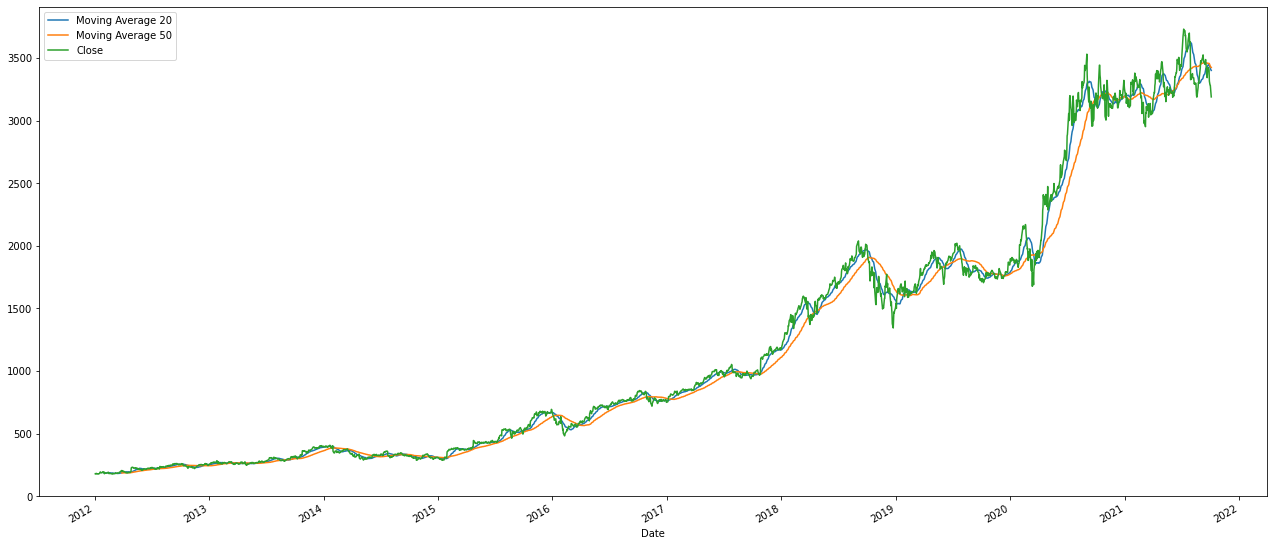

In [127]:
amzn['MA60'] = amzn.Close.rolling(60).mean()
amzn['MA20'] = amzn.Close.rolling(20).mean()
amzn.dropna()

#Plotting moving average for amazon 
plt.figure(figsize=(22,10))
amzn['MA20'].plot(label = 'Moving Average 20')
amzn['MA60'].plot(label='Moving Average 50')
amzn['Close'].plot(label='Close')
plt.legend()
plt.show()



*   Created MA20 and MA60, which are fast signal and slow signal respectively. 

*   Then, we have plotted close price, MA20 and MA60. If MA20 is larger than MA60, the stock price is believed that it goes up in the next several days. Otherwise, the price will decrease. 


    ! Our strategy is, if MA20 is larger than MA60, we will buy and hold one share of stock. Alternately speaking, we will long one share of stock.

In [128]:
# New "Shares" column to determine whether we long or not, created using list comprehension.

# 'Shares' = 1 if 'MA20' is larger than 'MA60', otherwise it is zero
amzn['Shares'] = [1 if amzn.loc[element,'MA20'] > amzn.loc[element, 'MA60'] else 0 for element in amzn.index]

To compute daily profit. First, create variable **"Close1"**, which is the close price of tommorow. Then we will create variable **"Profit"**, which indeed is daily profit. 
1.  If shares is equal to one(1), the daily profit is equal to the close price of tommorow minus close price of today.It can be positive or negative. If negative, we lose money on that day. 

2.  If shares are equal to zero(0), it means we do not have stock at hand, the profit is equal to zero. 

In [129]:
# 'Close1': Close price of tommorow
amzn['Close1'] = amzn.Close.shift(-1)

# 'Profit': Daily profit using 'Shares' column
amzn['Profit'] = [amzn.loc[element, 'Close1'] - amzn.loc[element, 'Close'] if amzn.loc[element, 'Shares'] == 1 else 0 for element in amzn.index]

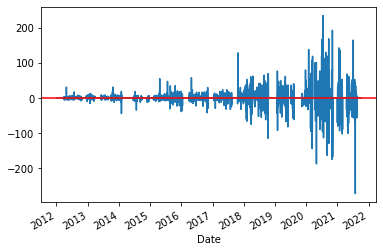

In [130]:
# Plot the "Profit" and finding the days we make or lose money.
amzn['Profit'].plot()
plt.axhline(y= 0, color = 'red');

In [131]:
# Computing the 'Wealth', which is a cumulative sum of the profit all over the period
amzn['Wealth'] = amzn['Profit'].cumsum()

In [132]:
amzn.tail()

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,Direction,MA60,MA20,Shares,Close1,Profit,Wealth
Date,,,,,,,,,,,,,,,
2021-09-28,3357.709961,3369.189941,3290.100098,3315.959961,3315.959961,4430800,-14.839844,-0.004475,0,3454.350830,3442.773499,0,3301.120117,0.0,1136.289871
2021-09-29,3322.110107,3351.300049,3297.870117,3301.120117,3301.120117,2562300,-16.080078,-0.004871,0,3448.107166,3434.290002,0,3285.040039,0.0,1136.289871
2021-09-30,3316.000000,3327.850098,3273.989990,3285.040039,3285.040039,2842400,-1.780029,-0.000542,0,3441.248165,3424.592004,0,3283.260010,0.0,1136.289871
2021-10-01,3289.010010,3309.169922,3255.939941,3283.260010,3283.260010,2835600,-93.479980,-0.028472,0,3433.779000,3415.598999,0,3189.780029,0.0,1136.289871
2021-10-04,3279.389893,3279.989990,3176.250000,3189.780029,3189.780029,4517500,NaN,NaN,0,3424.952999,3401.185498,0,NaN,0.0,1136.289871


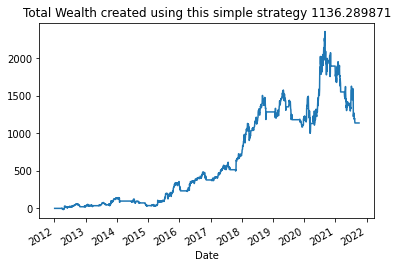

In [133]:
# Wealth plot showing growth of profit over the period
# In the last row, we have NaN values, because those returns are computed from Close1, and Close1 is calculated using shift(-1).
# So, to get a terminal wealth using loc, the index level should be amzn.index[-2]. 
f = amzn['Wealth'].plot()
plt.title('Total Wealth created using this simple strategy %f' % (amzn.loc[amzn.index[-2], 'Wealth']));

In [134]:
f.figure.savefig('wealth.png')
from google.colab import files
files.download('wealth.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


```
#This strategy seems to be very promising, but there are lots of questions if you want to implement it in real market. Can we find a better signal for trading? How do you evaluate your performance of shared strategy correctly?
```

# Predict stock returns using regression models


*   We will model stock return using normal random variable as it is important to know the distibution. Because it is really crucial in risk management.
*   Inferential Statistics depends upon the calculations of quantiles and cumulative distribution function, when constructing confidence levels or for the implementation of hypothesis testing.





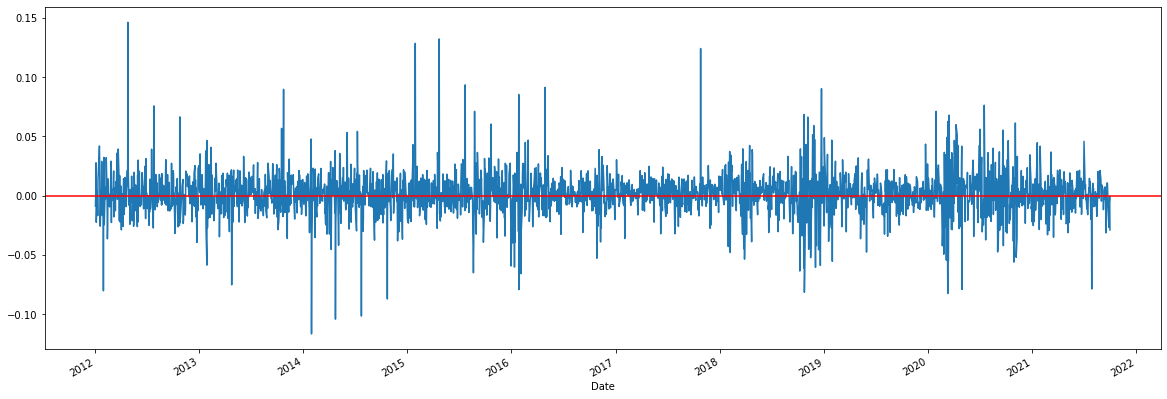

In [135]:
# Distribution of daily 'log return'
amzn['LogReturn'] = np.log(amzn['Close'].shift(-1)) -  np.log(amzn['Close'])
# Plotline 
amzn['LogReturn'].plot(figsize = (20,7))
plt.axhline(y= 0 , color = 'r');

* Evaluating Probability density function for a particular value of is not useful, *norm.pdf* measures probability for each possible value of a normal random variable. In fact normal random variable can take values from positive infinity to negative infinity. Two parameters 0, 1 in norm.pdf gives the mean and the standard deviation of a normal random variable. This normal random variable is also called a standard normal random variable, and its distribution is also called z-distribution. You can change these two values in order to get a different normal variables. Because, the density functions of a normal variables are only related to their mean and their variance.


    !  We model daily stock return using normal distribution. We do not know the real mean and standard deviation of this normal random variable. From the large collection of data return from historic data, we will compute the mean and the standard deviation.

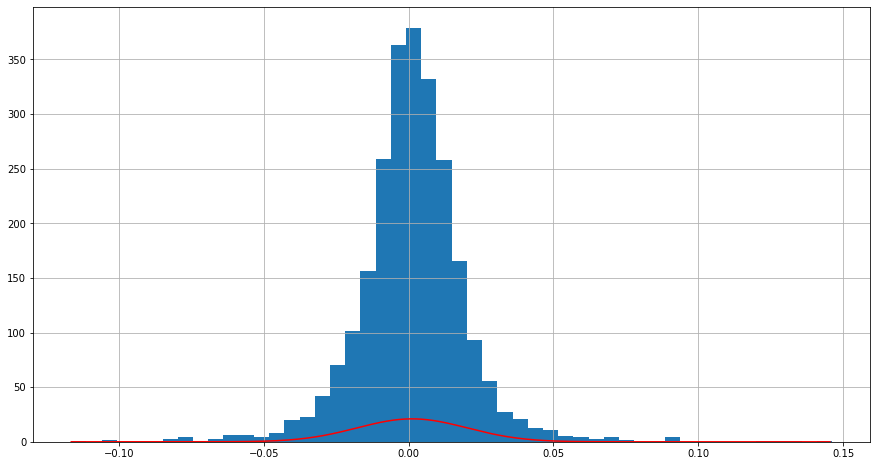

In [136]:
from scipy.stats import norm

mu = amzn['LogReturn'].mean()
sigma = amzn['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(amzn['LogReturn'].min(), amzn['LogReturn'].max(), 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

amzn['LogReturn'].hist(bins=50,figsize = (15,8))
plt.plot(density['x'], density['pdf'], color = 'red');

* CDF is the function that maps value to their percentile rank in a distribution. Here CDF outputs the probability and lower side of the area.

In [137]:
# Drop of amazon stock price upto 10 % over a day
drop_amzn = norm.cdf(-0.1, mu, sigma)
print('The probability is', drop_amzn)

The probability is 5.0864331842235996e-08


We need the independence when we compute the variance. If the data returns are independent, variance of a unit return is equal to the sum of a variance of 252 daily return.

*Probability of drop in stock price over a period of year - Typically a stock market operates for 252 days.*

In [138]:
mu252_amzn = 252 * mu
sigma252_amzn = (252 ** 0.5) * sigma

# Drop upto 20 % over a period of year
print('The probability of drop 20% over a year is', norm.cdf(-0.2, mu252_amzn, sigma252_amzn))

# Drop upto 40% over a period of year
print('The probability of drop 40% over a year is', norm.cdf(-0.4, mu252_amzn, sigma252_amzn))

The probability of drop 20% over a year is 0.050162645328782354
The probability of drop 40% over a year is 0.010549456983464264


**VAR** - **Value** **at** **risk**  
In finance related, it is an important risk measure "value of risk" or VaR. It estimates how much a set of investments might lose with a given probability. **VaR** is typically used by firms and the regulators in the financial industry to gauge the amount of assess needed to cover possible loss.

	✓	Calculating the percentage of risks of losing over the investment over a period.

In [139]:
# 25 % and 75% quantile of amzn stock of return
q25 = norm.ppf(0.25, mu, sigma)
q75 = norm.ppf(0.75, mu, sigma)
print('Quantile 25%:', q25)
print('Quantile 75%:', q75)

# Var: Value at Risk
var_amzn = norm.ppf(0.05, mu, sigma)
print('Var', var_amzn)

Quantile 25%: -0.011644827672994023
Quantile 75%: 0.013992141327699216
Var -0.03008631519785145


	✓ 5% of quantile of daily return is called a 95% VaR or VaR at the level of 95%. We use a ppf to get a 5% of quantile which is negative 0.03. hence, 95% of VaR is negative 0.03, it means with the 5% chance that daily return is worse than -3%. 


Is it safe to use normal description to model stock return? 
* In this way, distribution of a daily and monthly stock return, are rather symmetric about their means, but the tails are fatter, which means there are more outliers that would be expected with normal distributions. It means that, if tail returns negative, as well as positive, may occur more often than we expect. If we use normal distribution, this is debatable, at least for the returns of some assets with different time window size. 
* To modal a fat tail, people proposed modal return using t-distributions with low degree of freedom.

**Estimating the average return using confidence interval.**

Intuitionally, if a sample is a good representative of the population, the population mean should be close to sample mean. It is plausible to say that the population mean is in a range with sample mean centered.Hence, our task is to estimate population mean using interval with lower and upper bound. 
*  To start with, we need to standardize sample mean because different sample has different mean and a standard deviation.
*  We can standardize sample mean by minus it's mean, which is identical to population mean and then divided by its standard deviation, which is the standard deviation of population divided by square root of sample size.  

In [140]:
# Log return column will be used here for 90% confidence interval
sample_size_amzn = amzn['LogReturn'].shape[0]
sample_mean_amzn = amzn['LogReturn'].mean()
sample_std_amzn = amzn['LogReturn'].std(ddof=1)/ sample_size_amzn ** 0.5

# Confidence intervals for this distribution
left_interval = norm.ppf(0.05, sample_mean_amzn, sample_std_amzn)
right_interval = norm.ppf(0.95, sample_mean_amzn, sample_std_amzn)

print('90% Confidence interval is', (left_interval, right_interval))


90% Confidence interval is (0.0005427534724844146, 0.0018045601822207773)


**Hypothesis Testing**

To demonstrate validity of assertions. We need a new statistic tool, *hypothesis testing*. In statistics, hypothesis testing can use sample information to test the validity of conjectures about these parameters.

Let's start with hypothesis testing. The first step is to set hypothesis. We have null hypothesis(H0) and alternative hypothesis(H1). Usually, the null hypothesis is assertion we are against. Alternative hypothesis is a conclusion we accept whenever we reject the null.   

> **Set Hypothesis** - **H0: μ = 0**(Population mean is equal to 0) & **H1: μ ≠ 0**(Population mean is not equal to 0)


1.  Calculate test statistic (Z or t statistic)
2.  Set Decision-Criteria
3.  Making a test decision, Shall we accept or reject H0?

  --> One tail test

  -->  Using p-value















Intuitionally, given that the null is correct, the difference between sample statistic, x-bar, and the population parameter mu cannot be very large. If it's significantly large, the null should be incorrect, and we should accept alternative.
*  To measure the magnitude of difference, we consider the standard deviation of the sample, because the sample with a large standard deviation usually its magnitude is larger, hence we do standardization. 
*  We know population standard deviation, the standardized sample mean we denote as z-hat, and the z-distribution, if population is normal, or it's sample size large. If a z-hat is far away from 0, then null is not likely to be true. 

		In hypothesis testing, we start with assumption that the null is correct.
 

In [141]:
# Calculating test statistic for amazon
sample_mean_amzn = amzn['LogReturn'].mean()
sample_std_amzn  = amzn['LogReturn'].std(ddof=1)
sample_size_amzn = amzn['LogReturn'].shape[0]

# If the sample is size is large enough, we can use z-statistic 
# μ = 0 under null hypothesis
z_hat_amzn = (sample_mean_amzn - 0) / (sample_std_amzn / sample_size_amzn ** 0.5)
print('zhat Amazon:', z_hat_amzn)

zhat Amazon: 3.059888134008459


In [142]:
# Set decision Criteria
alpha = 0.05
z_left = norm.ppf(alpha/2, 0, 1)
z_right = - z_left

print((z_left, z_right))

(-1.9599639845400545, 1.9599639845400545)


* We fixed the significance level, alpha equal to 5%, which is the probability for z to take the values of some demands of the two tails? We can see that these two demands(z < -1.96 & z > 1.96) which are are 2.5% and 97.5% quantiles of z.


	▪	 These two demands are called rejection regions and this kind of test is called two-tailed test. If statistic z-hat falls into rejection region, we can tell that statistics is far away from 0 significantly then we can reject the null.

In [143]:
# Shall we accept or reject H0
print('At significant level of {}, shall we reject {}'.format(alpha, z_hat_amzn < z_left or z_hat_amzn > z_right))

At significant level of 0.05, shall we reject True


**One tail test**
$H_0 : \mu \leq 0$ 
$H_a : \mu > 0$

In [144]:
# Decision criteria
alpha = 0.05
zright = norm.ppf(1-alpha, 0, 1)
print(zright)

1.6448536269514722


In [145]:
# Make decision
print('At significant level of {}, shall we reject {}'.format(alpha, z_hat_amzn > zright))

At significant level of 0.05, shall we reject True


**p-value**

A more popular way of testing is to compute p-value. We know that given that null is correct, standardized sample mean follows z-distribution. 

*  What is the probability for this distribution to take a more extreme value than our observation in given sample? This is a p-value, if p is less than alpha which is a threshold, it means that the null is unlikely to be true.
* With p-value, we only need to compare it with alpha although the way to compute p is different. Here's a demonstration of p-value approach, in two-tailed test, abs is to compute the absolute value.

In [146]:
# Method to make decision p-value
p = 1 - norm.cdf(abs(z_hat_amzn), 0, 1)
print(p)

0.0011070983879635232


In [147]:
print('At significant level of {}, shall we reject {}'.format(alpha, p < alpha))

At significant level of 0.05, shall we reject True


    ▪   Hypothesis testing provides a decision making criteria to accept or reject hypothesis. But it may cause type 1 error where null hypothesis is correct and we may reject the hypothesis. So it is not the only criteria for the decision criteria. 

# Multiple Regression Model


We will apply Multiple Linear Regression model to generate a signal for the growth of SPY. The exchange-traded fund, which tracks S&P 500. 
The most interesting part is that we will view the model using multiple indices from the global markets and predict the price change of SPY.(Reason to choose SPY as a target to view the regression model is because it is very suitable for trading frequently. Volatility of SPY is very high. Two digits loss and gains race appears often)

Multiple Linear Regression will have multiple predictors. Our response variable is open price of SPY tomorrow minus today's open. With this response, we expect to make a prediction in the morning in US market. Based on predict price change, we decide whether to long or short. Here, totally, we have eight predictors.
 
 **Note** : Just a reminder, we cannot use any information available after the opening of a US market on current day to calculate predict values. In other words, these variables cannot be predictors.

	✓	 We will have three groups of predictors. The first group is a one-day lag variables from "US" market. Open minus open price of last day for SPY, Sp500, Nasdaq, and the Dji. The second group is a one-day lag variables from "European" markets. Open minus open price of last day for Cac40 and the Daxi.(Ideally, for European markets, we want to use price at noon minus open price. If you have intraday data, you can improve this model. However, Yahoo Finance does not provide intraday data).  Last group, close price minus open price of Aord, HSI, and the Nikkei in Asia, "Australian" markets.

Next, we will mung the data to get all these predictors and the response. First, we generate an empty data frame and let the index to be the same as the index of SPY. Then, we add the contents of response and predictors we defined.Notice, in the last row of close, we keep a record of open price of SPY.

In [148]:
IndicePanel=pd.DataFrame(index=Spy.index)

#US market
IndicePanel['spy']=Spy['Open'].shift(-1)-Spy['Open']
IndicePanel['spy_lag1']=IndicePanel['spy'].shift(1)
IndicePanel['sp500']=SP500["Open"]-SP500['Open'].shift(1)
IndicePanel['nasdaq']=Nasdaq_composite['Open']- Nasdaq_composite['Open'].shift(1)
IndicePanel['dji']=Dji['Open']-Dji['Open'].shift(1)

#European Market
IndicePanel['cac40']=Cac40['Open']-Cac40['Open'].shift(1)
IndicePanel['daxi']=Daxi['Open']-Daxi['Open'].shift(1)

#Asian Market
IndicePanel['hsi'] = Hsi['Close'] - Hsi['Open']
IndicePanel['nikkei'] = Nikkei225['Close'] - Nikkei225['Open'] 
IndicePanel['aord'] = Aord['Close']- Aord['Open']

IndicePanel['Price'] = Spy['Open']

IndicePanel.isnull().sum()


spy           1
spy_lag1      1
sp500         1
nasdaq        1
dji           1
cac40        28
daxi         52
hsi         115
nikkei      149
aord         46
Price         0
dtype: int64

    We find missing values. This is due to two reasons. When we calculate price change, we may generate NaN value in the first row, one-day lag, and the last row, one-day in the future. In different markets, they may have different holidays in which the markets are closed. It can be shown by computing numbers of NaN values in each column. We find Australia markets seems to have more holidays. We need to handle NaN values first before we view the model. First, we use fill-forward method to fill the holes of data frame by propagating last valid observation forward to next valid. Second, we drop the first row by using dropna. 

In [149]:
# DATA MUNGING
indicepanel = IndicePanel.fillna(method = 'ffill')
indicepanel.dropna(how='any')
indicepanel.isnull().sum()
# save this indicepanel for part 4.5
indicepanel.to_csv('indicepanel.csv')
files.download('indicepanel.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [150]:
print(indicepanel.shape)

(2455, 11)


In [151]:
# DATA SPLITTING
#split the data into train set and test set

Train = indicepanel.iloc[-2449:-1234, :]
Test = indicepanel.iloc[-1215:, :]
print(Train.shape, Test.shape)

(1215, 11) (1215, 11)


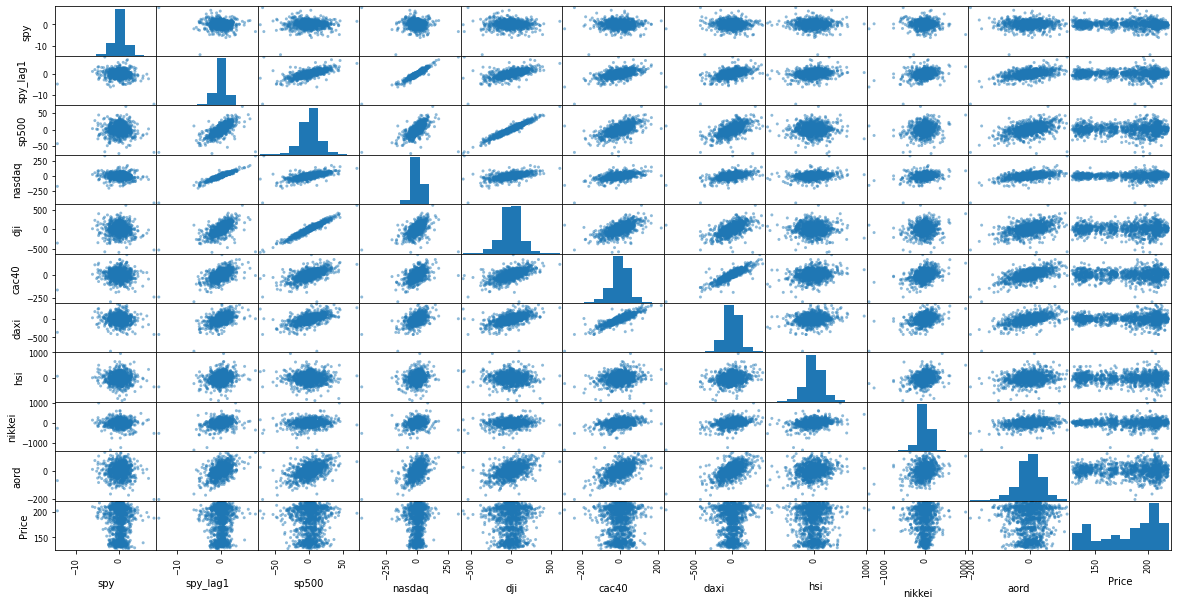

In [152]:
# scatter_matrix
from pandas.plotting import scatter_matrix

sm = scatter_matrix(Train, grid= True, figsize = (20,10));

	✓	You may find that, there is no explicit pattern, which is evidence of high noisy properties of stock markets.  


In [153]:
# Find the indice with largest correlation
corr_array = Train.iloc[:, :-1].corr()['spy']
print(corr_array)

spy         1.000000
spy_lag1   -0.074537
sp500      -0.019273
nasdaq     -0.066339
dji        -0.034198
cac40      -0.038057
daxi       -0.033772
hsi        -0.030826
nikkei     -0.027551
aord       -0.009840
Name: spy, dtype: float64


    We find that the predictors for Europe and Asian markets do have association with SPY, which have higher impacts than predictor of U.S. markets.

	✓	OLS method of Statsmodels to build multiple linear equation model.

In [154]:
formula = 'spy~spy_lag1+sp500+nasdaq+dji+cac40+aord+daxi+nikkei+hsi'
lm = smf.ols(formula=formula, data=Train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    spy   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.312
Date:                Tue, 05 Oct 2021   Prob (F-statistic):             0.0141
Time:                        13:07:09   Log-Likelihood:                -2206.2
No. Observations:                1215   AIC:                             4432.
Df Residuals:                    1205   BIC:                             4483.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0673      0.043      1.560      0.119      -0.017       0.152
spy_lag1      -0.1057      0.090     -1.179      0.239      -0.282       0.070
sp500          0.0474      0.014      3.464      0.001       0.021       0.074
nasdaq        -0.0021      0.003     -0.695      0.487      -0.008       0.004
dji           -0.0046      0.001     -3.155      0.002      -0.007      -0.002
cac40         -0.0011      0.002     -0.557      0.578      -0.005       0.003
aord           0.0016      0.001      1.169      0.242      -0.001       0.004
daxi           0.0002      0.001      0.255      0.799      -0.001       0.002
nikkei      -3.83e-05      0.000     -0.128      0.898      -0.001       0.001
hsi        -9.656e-05      0.000     -0.369      0.712      -0.001       0.000
==============================================================================
Omnibus:                      351.095   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4682.292
Skew:                          -0.949   Prob(JB):                         0.00
Kurtosis:                      12.428   Cond. No.                         424.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 From the summary, a couple things we need to pay attention; 
*  First thing is a p value for F-statistics. **F test** is for overall significance of the multiple linear equation model. 

       H0: β1 = β2 = β3 = β4 = ...... = 0

       Ha: at least on of them is not zero

  If we reject, we accept alternative and it means that at least one of the predictors is useful. Our model is better fitted than intercept only model. P-value equal to 0.0219 in our model, which is less than 0.05 and it indicates that, our model includes useful predictors. 

*  Summary table also lists the p value for the test of significance of the individual predictors. 

     Significance of the **individual predictors - t test** 

        H0: β1 = 0       β2 = 0         ......

        Ha: β1 != 0      β2 != 0        ......

 


Most of the predictors are not significant,may be because of multicollinearity. 

	Multicollinearity refers to a situation in which two or more predictors in the multiple regression model are highly, linearly related. 
One predictor can be predicted from the others with a substantial degree of accuracy and it is typical for our model since all indices of different markets are correlated.In this situation, the coefficient estimates of the multiple equation may change erratically in response to small changes of data. 


In [155]:
# Making Prediction
Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)

 Now, we can **predict** daily change of SPY using message predict of our model LM. We predict SPY in both train and test. 

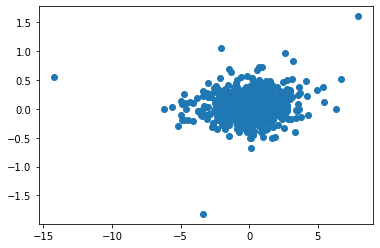

In [156]:
plt.scatter(Train['spy'], Train['PredictedY'])

    Scatterplot between real daily change and predict daily change of SPY: Does have positive correlation although not very strong. Considering it is daily change, this result is not very bad.

**MODEL EVALUATION**

Evaluate our models by comparing two statistics in train and test. 

*  First statistic is **RMSE**, which is the square root of sum of squared errors averaged by degrees of freedom, where k is number of predictors. This statistic is to measure the prediction error. The reason to use the degrees of freedom is that, square of RMSE is unbiased estimator of variance of the noise. 

*   The second is **adjusted R-square**. In Simple Linear Regression, we use R-square to get the percentage of variation that can be explained by a model. We found that by adding more predictors, the R2 square is always increasing, but the accuracy is even worse. To compensate the effects of numbers predictors, we have adjusted R-square, which measures percentage of variation of a response that is explained by the model.

In [157]:
# RMSE, Adj R^2
# Parameter model is a model name and model k is the number of predictors. Y name is a column name of our response variable

def adjustedMetric(data, model, model_k, yname):
    data['yhat'] = model.predict(data)
    SST = ((data[yname] - data[yname].mean())**2).sum()
    SSR = ((data['yhat'] - data[yname].mean())**2).sum()
    SSE = ((data[yname] - data['yhat'])**2).sum()
    r2 = SSR/SST
    adjustR2 = 1 - (1-r2)*(data.shape[0] - 1)/(data.shape[0] - model_k -1 )
    RMSE = (SSE/(data.shape[0] - model_k - 1))**0.5
    return adjustR2, RMSE

In [158]:
def assessTable(test,train, model, model_k, yname):
    r2test, RMSEtest = adjustedMetric(test,model, model_k, yname)
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
    assessment = pd.DataFrame(index = ['R2', 'RMSE'], columns = ['Train', 'Test'])
    assessment['Train'] = [r2train, RMSEtrain]
    assessment['Test'] = [r2test,RMSEtest]
    return assessment
    

We compute RMSE and adjust R-square in both train and test in order to check whether they are different dramatically. If so, this is called overfitting. Usually, for overfitting model, RMSE and adjusted R-square is much better in train than in test dataset. That it implies that we cannot apply this model to real market in future.

In [159]:
# Assessment Table for our model
assessTable(Test,Train,lm,9,'spy')

,Train,Test
R2,0.009630,0.017726
RMSE,1.493322,3.247854


	✓	From output our model, RMSE increases in test, which is a bit worse than that in the train, where the test is better. Overall, our model is not overfitted. Our R-square is quite low, but in stock market it's not that bad. 

**STRATEGY EVALUATION**

We will use predict price change of SPY as a trading signal and then perform a simple strategy. If the signal is positive, we were long. Otherwise, we were shot. 

*   First, we'll compute a position of our trading based on our predicted value of a response. Order equal to one if predicted value is positive or our prediction for price change is positive for opening today to opening tomorrow. Otherwise, order equal to negative one, which means we will sell one share if we had one share, and then short sell one share. 


In [160]:
# Profit of Signal-Based Strategy 
# Train Data
Train['Order'] = [1 if signal>0 else -1 for signal in Train['PredictedY']]

# Daily profit is computed in column is profit. 
Train['Profit'] = Train['spy'] * Train['Order']

Train['Wealth'] = Train['Profit'].cumsum()
print('Total profit made in Train: ', Train['Profit'].sum())

Total profit made in Train:  140.06002807617188


 Then, we can compare the performance of this strategy, which we call the **signal-based strategy**, with a passive strategy, which we call **buy and hold strategy**, which is to buy more shares of SPY initially and hold it for certain days. 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

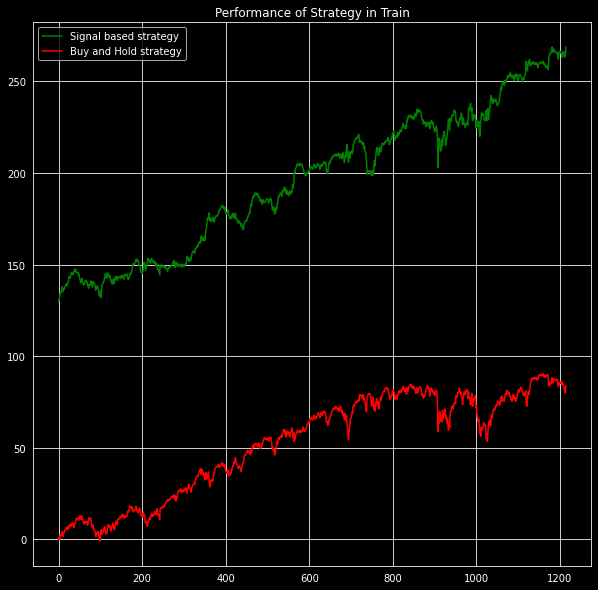

In [210]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Train')
plt.plot(Train['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Train['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.savefig('signal(vs)buy_hold_strategy(Train_Data).png')
files.download('signal(vs)buy_hold_strategy(Train_Data).png')

    We can see from the plot, signal-based strategy outperforms buy-and-hold strategy.

In [162]:
# Proft of Signal-Based Strategy
# Test Data
Test['Order'] = [1 if sig>0 else -1 for sig in Test['PredictedY']]
Test['Profit'] = Test['spy'] * Test['Order']

Test['Wealth'] = Test['Profit'].cumsum()
print('Total profit made in Test: ', Test['Profit'].sum())

Total profit made in Test:  112.60006713867188


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

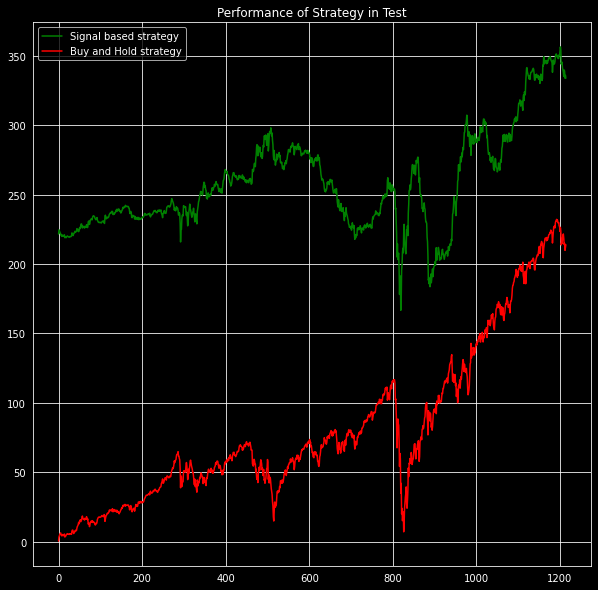

In [209]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Test')
plt.plot(Test['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Test['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.savefig('signal(vs)buy_hold_strategy(Test_Data).png')
files.download('signal(vs)buy_hold_strategy(Test_Data).png');

    Similarly, we can view the trading in test dataset, and the total profit is $113, lower than that in train.

The consistency of performance is very important. Otherwise, it is too risky to apply it in the future. Average daily return is a mirror we can make comparison in finance industry when they use a **Sharpe ratio** and **Maximum drawdown**.

*  *Sharpe ratio* measures excess return per unit of deviation in an investment asset or trading strategy named after William Sharpe. Daily Sharpe ratio is equal to the mean of excess return divided by standard deviation of excess return. 
    Since there are about 252 trading days per year in US stock market, the yearly Sharpe ratio is equal to daily Sharpe ratio multiplied by square root of 252. 

*   *Maximum drawdown* is a maximum percentage decline in the strategy from the historical peak profit at each point in time. We first compute drawdown, and then the maximum of all drawdowns in the trading period. Maximum drawdown is that risk of mirror for extreme loss of a strategy. To compute a drawdown, we need to compute peak of wealth process.At every time point, we can do it easily using data frame method, cummax.


In [164]:
# INCLUDING The "initial investment" which is one price of SPY.
Train['Wealth'] = Train['Wealth'] + Train.loc[Train.index[0], 'Price']
Test['Wealth'] = Test['Wealth'] + Test.loc[Test.index[0], 'Price']

In [165]:
# Sharpe Ratio on Train data
Train['Return'] = np.log(Train['Wealth']) - np.log(Train['Wealth'].shift(1))
dailyr = Train['Return'].dropna()

print('Daily Sharpe Ratio of Train Data is', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio of Train Data is', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio of Train Data is 0.07895452851456201
Yearly Sharpe Ratio of Train Data is 1.2533642839913346


In [166]:
# Sharpe Ratio in Test data
Test['Return'] = np.log(Test['Wealth']) - np.log(Test['Wealth'].shift(1))
dailyr = Test['Return'].dropna()

print('Daily Sharpe Ratio of Test Data is', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio of Test Data is', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio of Test Data is 0.024421253270360144
Yearly Sharpe Ratio of Test Data is 0.3876753771473746


In [167]:
# Maximum Drawdown in Train data
Train['Peak'] = Train['Wealth'].cummax()
Train['Drawdown'] = (Train['Peak'] - Train['Wealth'])/Train['Peak']

# Maximum Drawdown in Test data
Test['Peak'] = Test['Wealth'].cummax()
Test['Drawdown'] = (Test['Peak'] - Test['Wealth'])/Test['Peak']


In [168]:
print('Maximum Drawdown in Train is ', Train['Drawdown'].max())
print('Maximum Drawdown in Test is ', Test['Drawdown'].max())

Maximum Drawdown in Train is  0.1359493256477735
Maximum Drawdown in Test is  0.44111852839093285


    We find maximum drawdown in train and in test are not so close. The result shows that if we apply this strategy in test set, the maximum loss from the peak is thirty eight percent. 

From the mirror of a Sharpe ratio and maximum drawdown, we can tell that the performance of strategy is quite consistent in place of extreme loss. But the return per unit risk is not very consistent.
 
    1) We trained the application of a linear regression model in SPY trading. We conclude that the derived model is not overfitted and the performance of signal-based strategy is consistent in terms of risks of large loss.
    
    2) It is promising to further develop it into a profitable strategy, but they may cost a lot of efforts. Although the phase ratio of SPY trading is very low, the bid-ask spread is a hidden cause for this strategy and may eat up all profits.

# LTSM model

LTSM is very powerful model in sequence prediction problems because they're able to store past information. Here, it will be important becuase of the previous price of a stock is crucial in predicting its future price.

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('dark_background')

In [170]:
# Stocks
tech_list = ['AMZN', 'AAPL', 'FB', 'TSLA', 'GOOG', 'MSFT']
company_list = [amzn,aapl,fb,tsla,google,ms]
company_name = ['Amazon','Apple','Facebook','Tesla','Google','Microsoft']

for company, name in zip(company_list,company_name):
      company[company_name] = name


In [171]:
 # Concatenated All stocks to df
 df = pd.concat(company_list,axis = 0)
 df.shape     

(14635, 22)

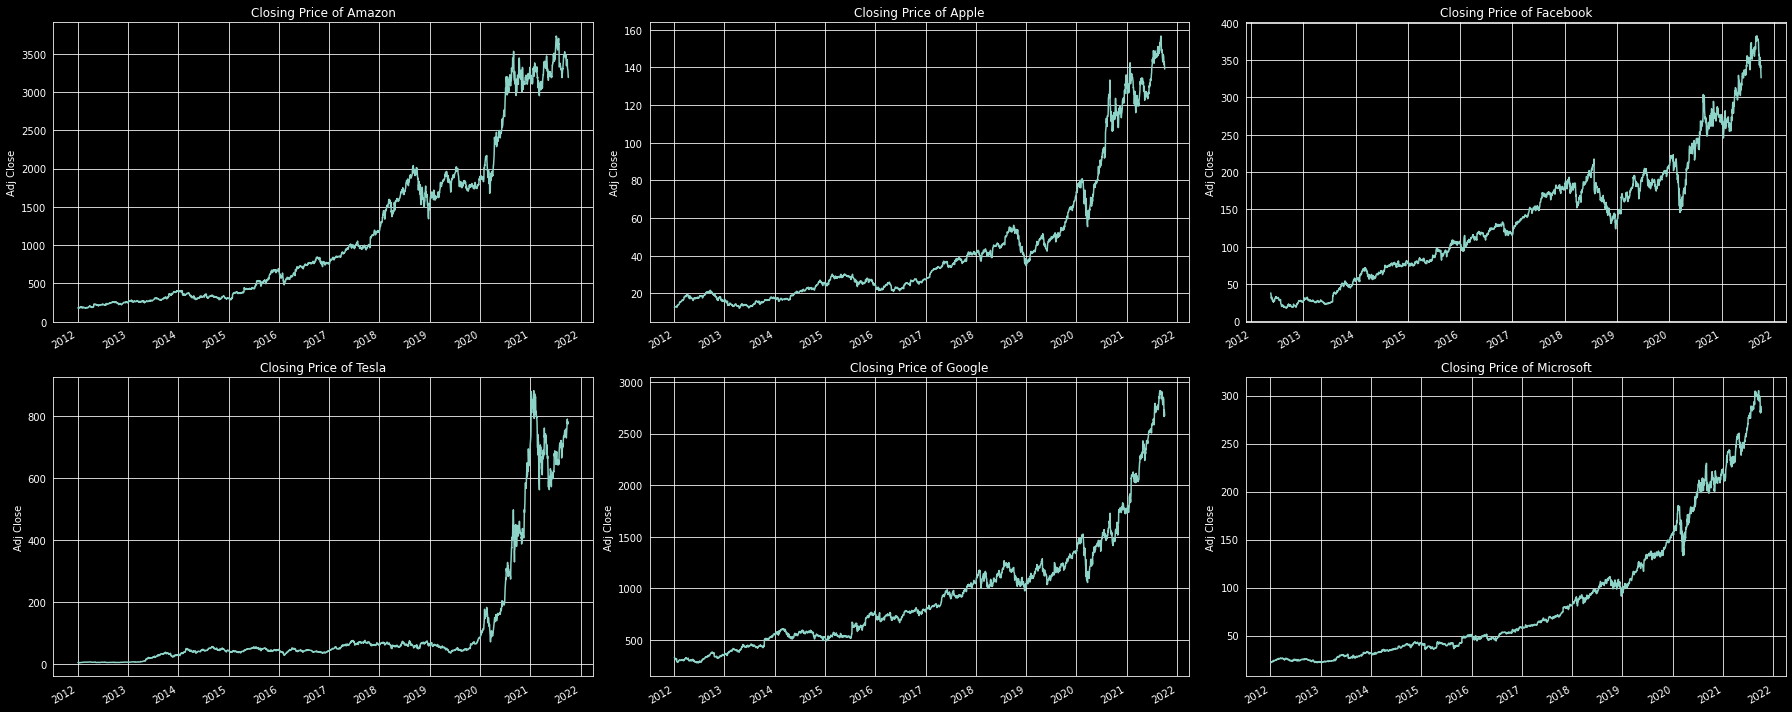

In [172]:
# view of Adjusted Close prices 
plt.figure(figsize=(25,10))

for i,company in enumerate(company_list,1):
      plt.subplot(2,3,i)
      company['Adj Close'].plot()
      plt.ylabel('Adj Close')
      plt.xlabel(None)
      plt.title(f'Closing Price of {company_name[i-1]}')

plt.tight_layout()

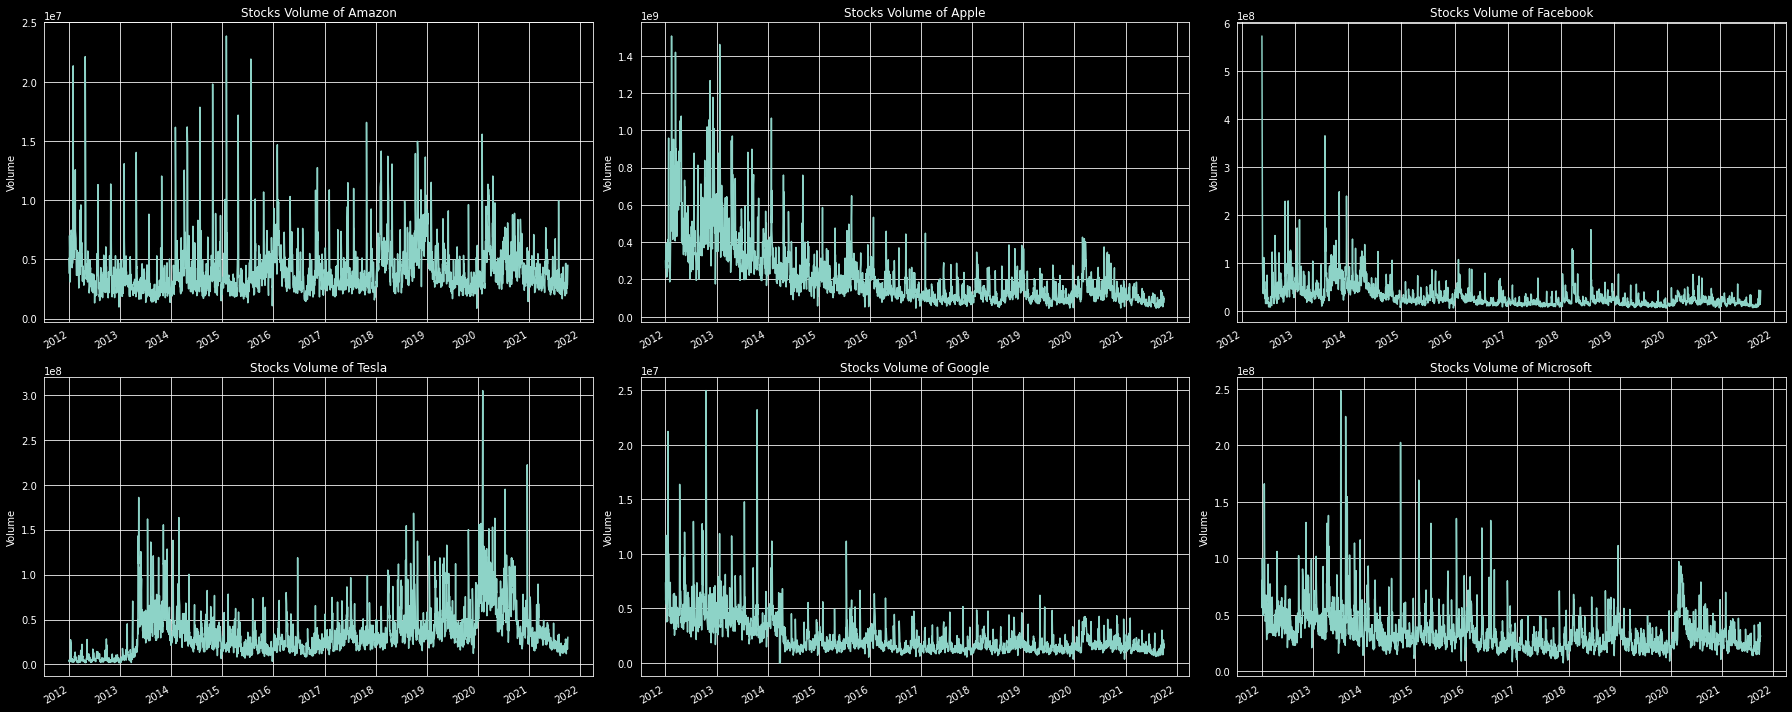

In [173]:
#Historical view of volume of stock buyers

plt.figure(figsize =(25,10))

for i,company in enumerate(company_list, 1):
      plt.subplot(2,3,i)
      company['Volume'].plot()
      plt.ylabel('Volume')
      plt.xlabel(None)
      plt.title(f'Stocks Volume of {company_name[i-1]}')

plt.tight_layout()


In [174]:
# Moving Average
avg_day = [10,20,50]

for ma in avg_day:
    for company in company_list:
        column_name = f'MA for {ma} days'
        company[column_name] = company['Adj Close'].rolling(ma).mean()


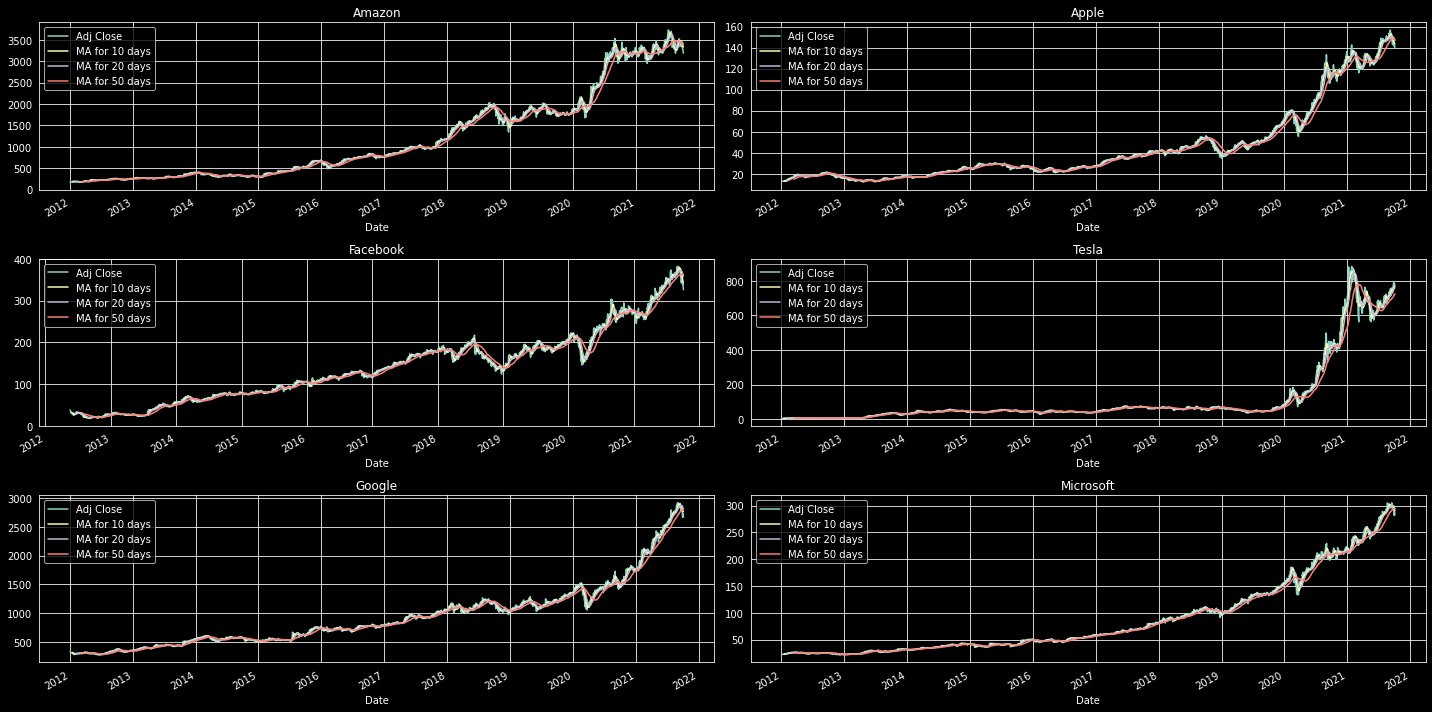

In [175]:
# Trend plots of moving average

fig,axes = plt.subplots(nrows=3, ncols = 2)
fig.set_figheight(10)
fig.set_figwidth(20)

amzn[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Amazon')

aapl[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Apple')

fb[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Facebook')

tsla[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Tesla')

google[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('Google')

ms[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('Microsoft')

fig.tight_layout()



**Percent change for each day**

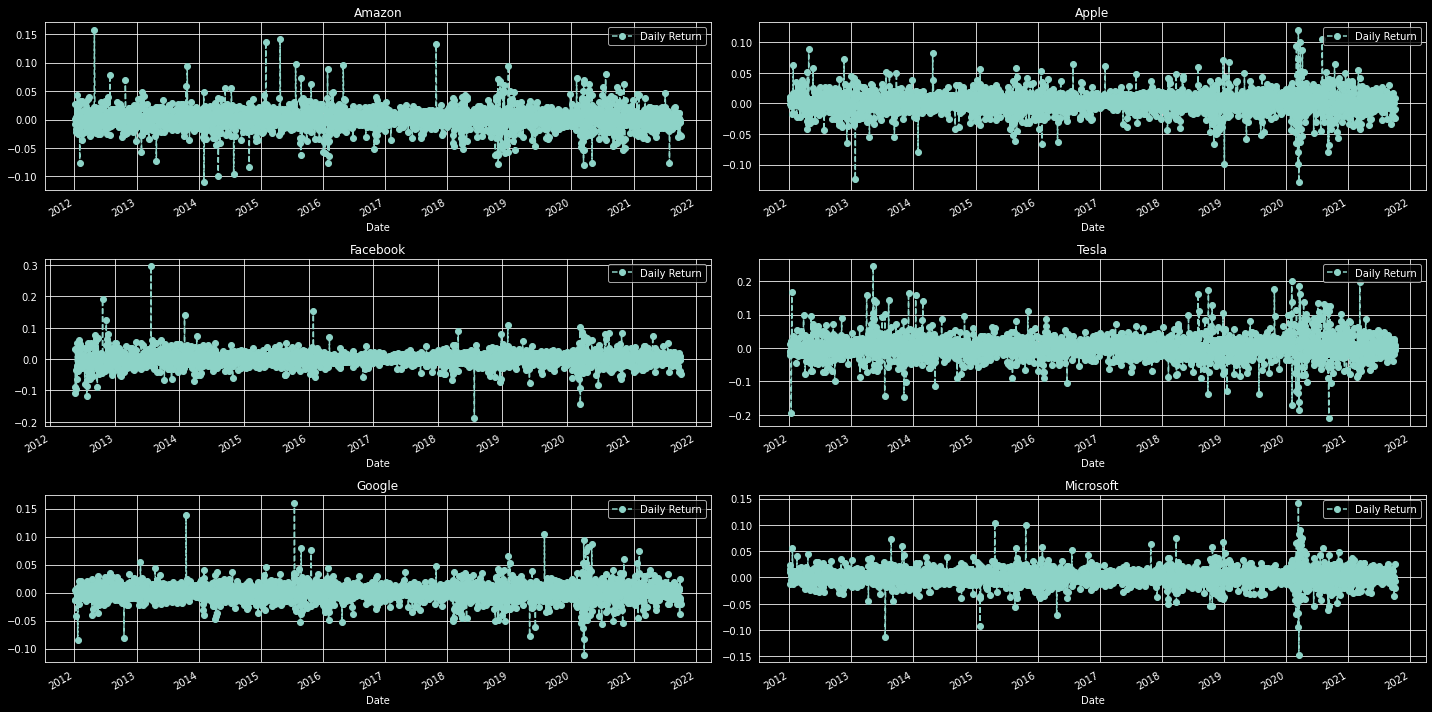

In [176]:
for company in company_list:
      company['Daily Return'] = company['Adj Close'].pct_change()

# Daily retun percentages

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(20)

amzn['Daily Return'].plot(ax=axes[0,0], legend = True, linestyle = '--', marker ='o')
axes[0,0].set_title('Amazon')

aapl['Daily Return'].plot(ax=axes[0,1], legend = True, linestyle = '--', marker ='o')
axes[0,1].set_title('Apple')

fb['Daily Return'].plot(ax=axes[1,0], legend = True, linestyle = '--', marker ='o')
axes[1,0].set_title('Facebook')

tsla['Daily Return'].plot(ax=axes[1,1], legend = True, linestyle = '--', marker ='o')
axes[1,1].set_title('Tesla')

google['Daily Return'].plot(ax=axes[2,0], legend = True, linestyle = '--', marker ='o')
axes[2,0].set_title('Google')

ms['Daily Return'].plot(ax=axes[2,1], legend = True, linestyle = '--', marker ='o')
axes[2,1].set_title('Microsoft')

plt.tight_layout()






**Using seaborn to create histogram and kde plot to look at the average daily return.**

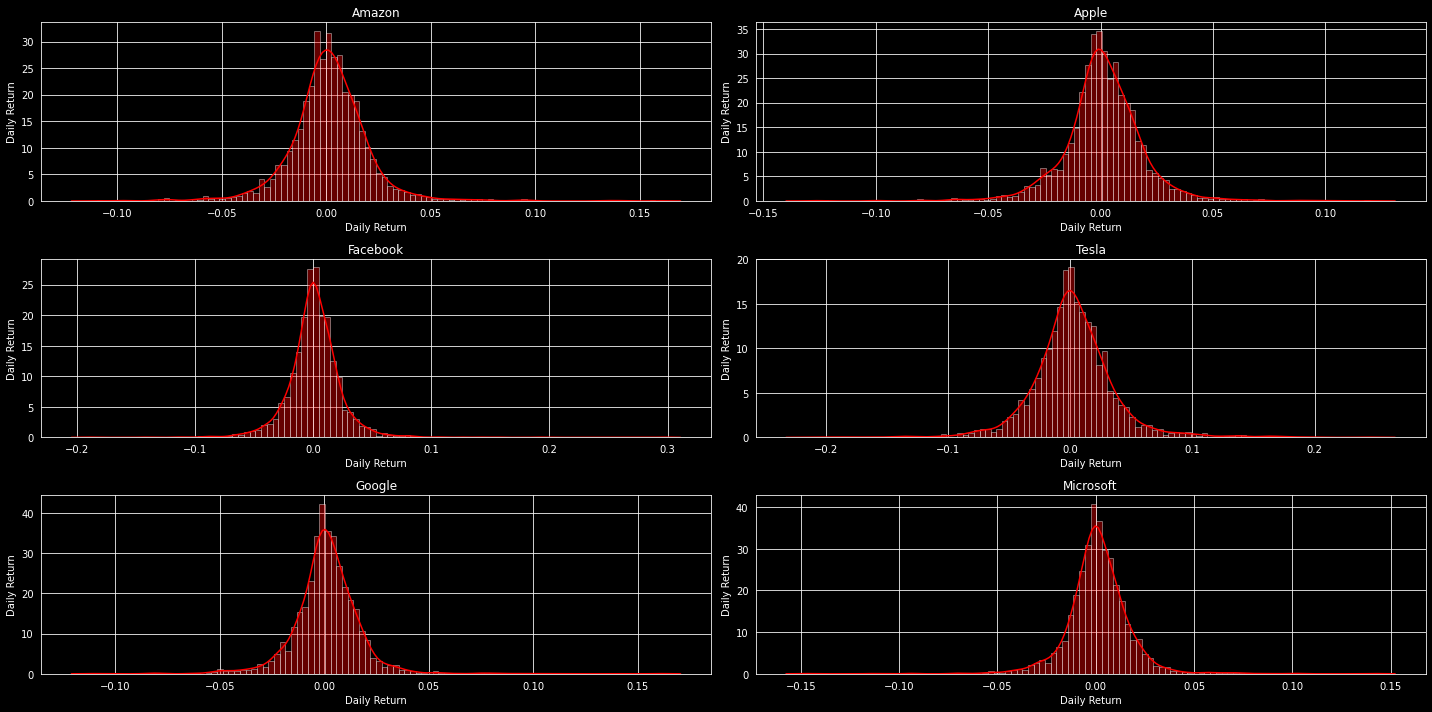

In [177]:
plt.figure(figsize = (20,10))

for i, company in enumerate(company_list, 1):
      plt.subplot(3,2,i)
      sns.distplot(company['Daily Return'].dropna(), bins = 100, color = 'red')
      plt.ylabel('Daily Return')
      plt.title(f'{company_name[i-1]}')

plt.tight_layout()

In [178]:
# Assigning only closing prices of stocks into a dataframe
close_df = pd.DataFrame()
close_df = close_df.assign(Amazon = amzn['Adj Close'], Apple = aapl['Adj Close'], 
                           Facebook = fb['Adj Close'], Tesla = tsla['Adj Close'], 
                           Google = google['Adj Close'], Microsoft = ms['Adj Close'])
close_df

,Amazon,Apple,Facebook,Tesla,Google,Microsoft
Date,,,,,,
2012-01-03,179.029999,12.610313,NaN,5.616000,331.462585,21.707487
2012-01-04,177.509995,12.678086,NaN,5.542000,332.892242,22.218344
2012-01-05,177.610001,12.818833,NaN,5.424000,328.274536,22.445396
2012-01-06,182.610001,12.952841,NaN,5.382000,323.796326,22.794081
2012-01-09,178.559998,12.932296,NaN,5.450000,310.067780,22.494045
...,...,...,...,...,...,...
2021-09-28,3315.959961,141.910004,340.649994,777.559998,2723.679932,283.519989
2021-09-29,3301.120117,142.830002,339.609985,781.309998,2690.419922,284.000000
2021-09-30,3285.040039,141.500000,339.390015,775.479980,2665.310059,281.920013


In [179]:
# Daily returns of all the stocks 
daily_returns= close_df.pct_change()
daily_returns.head()

,Amazon,Apple,Facebook,Tesla,Google,Microsoft
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,-0.008490,0.005374,NaN,-0.013177,0.004313,0.023534
2012-01-05,0.000563,0.011102,NaN,-0.021292,-0.013871,0.010219
2012-01-06,0.028152,0.010454,NaN,-0.007743,-0.013642,0.015535
2012-01-09,-0.022178,-0.001586,NaN,0.012635,-0.042399,-0.013163


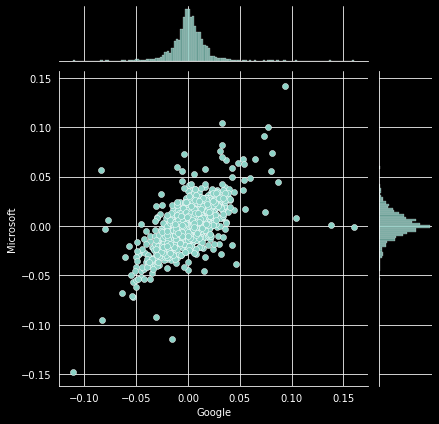

In [180]:
sns.jointplot('Google', 'Microsoft', daily_returns, kind='scatter')

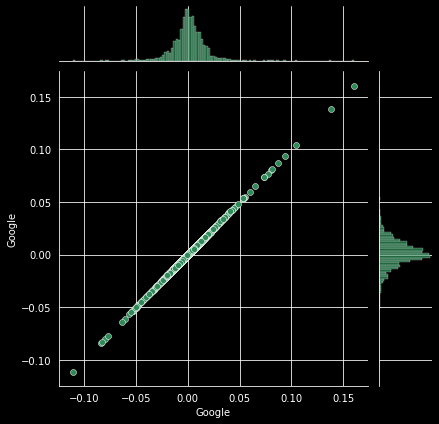

In [181]:
# You can see the linear relationship if you compare the stock to its own.
sns.jointplot('Google', 'Google', daily_returns, kind='scatter', color='seagreen')

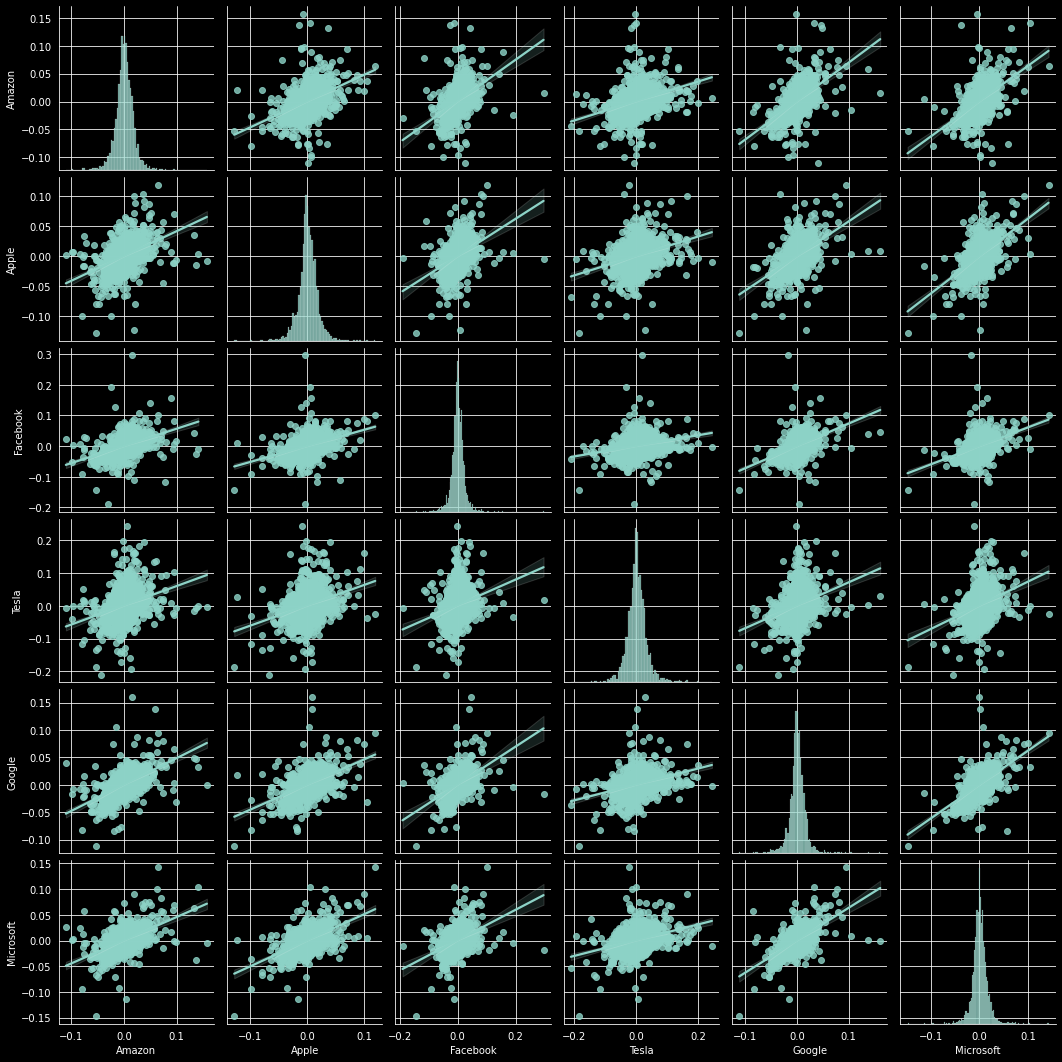

In [182]:
sns.pairplot(daily_returns, kind='reg')

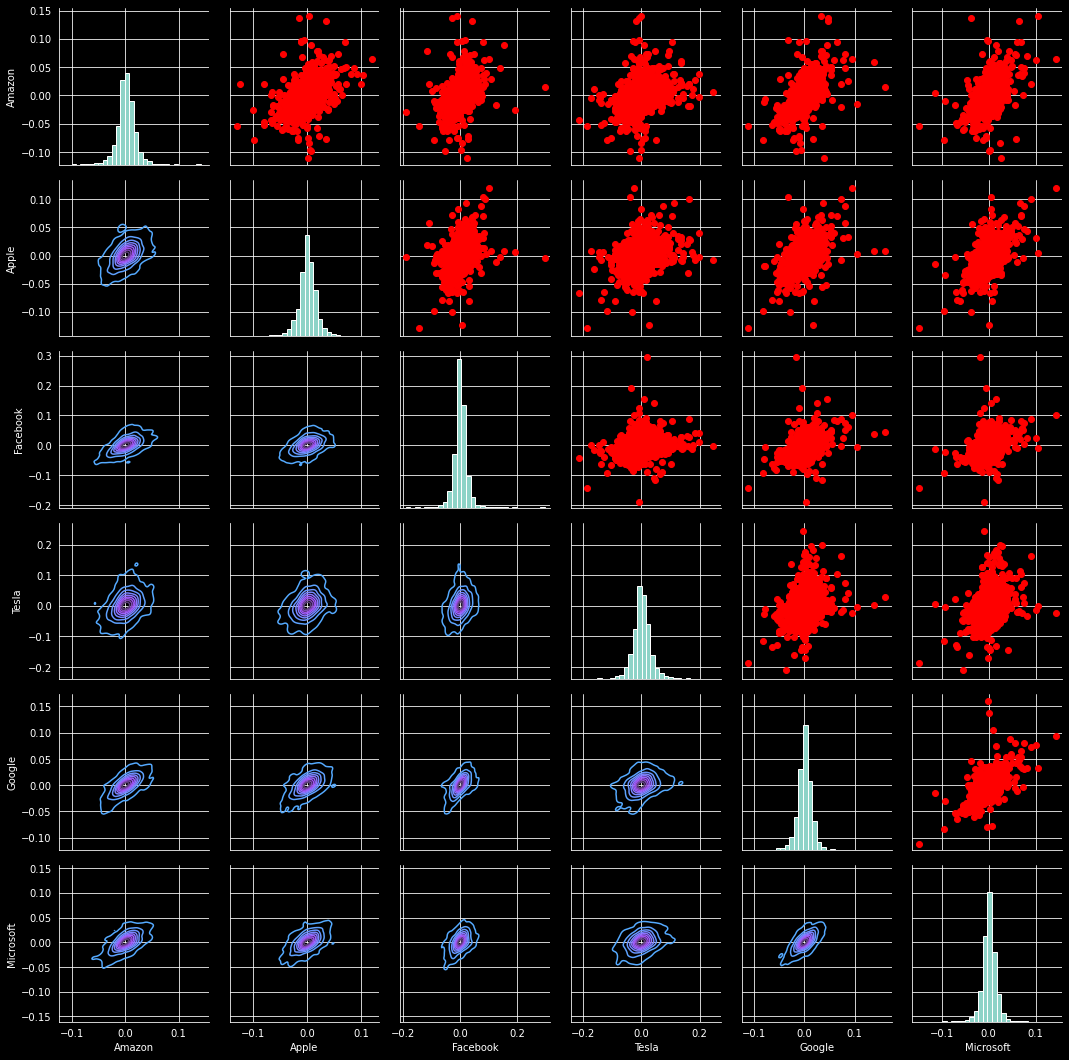

In [183]:
return_fig = sns.PairGrid(daily_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='red')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

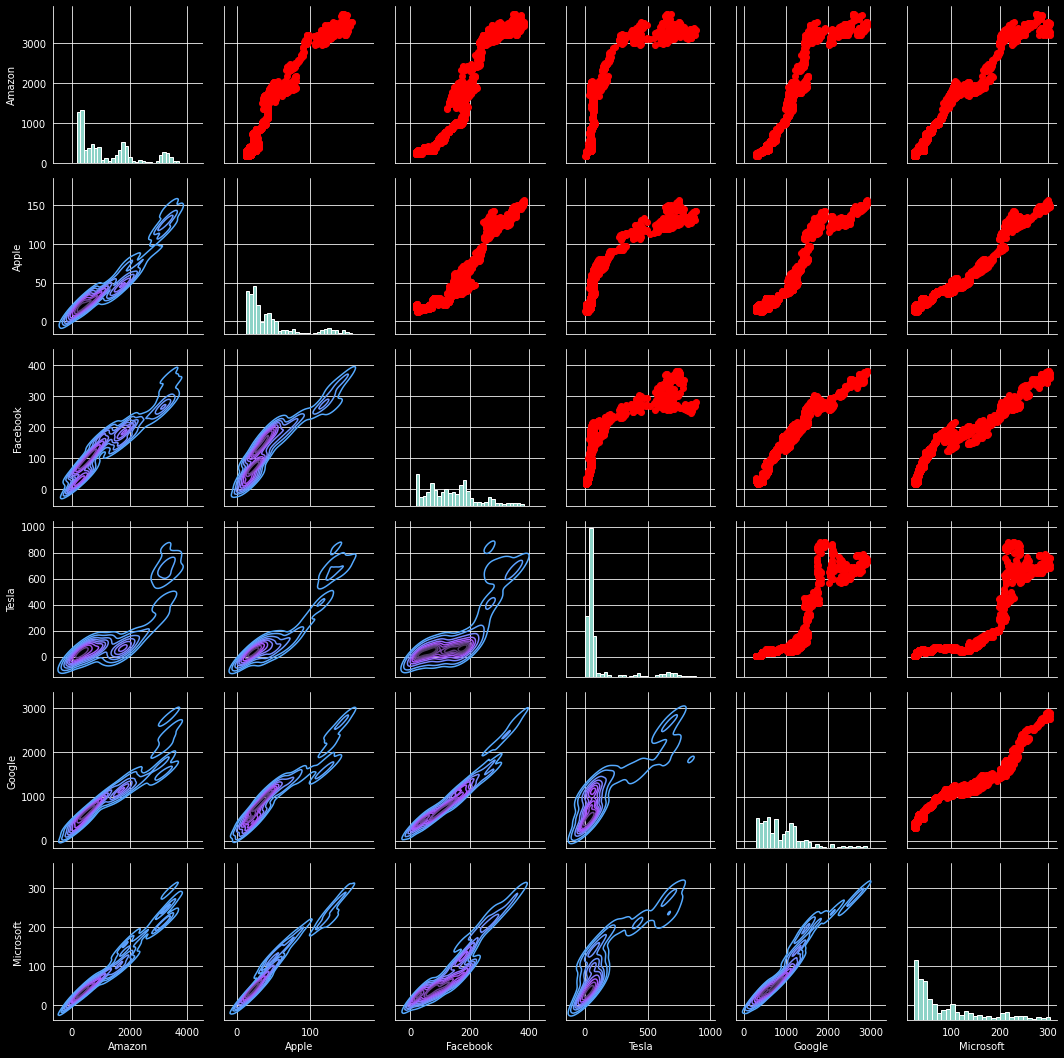

In [184]:
# For the close_df dataframe
returns_fig = sns.PairGrid(close_df)
returns_fig.map_upper(plt.scatter, color = 'red')
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
returns_fig.map_diag(plt.hist,bins= 30 )

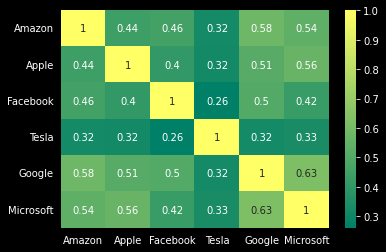

In [185]:
#correlation matrix for daily returns
sns.heatmap(daily_returns.corr(),annot= True,cmap= 'summer')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

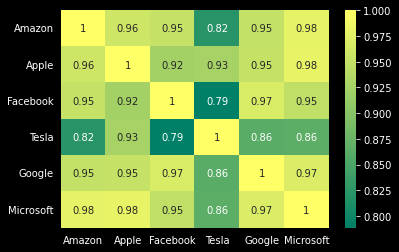

In [199]:
#correlation matrix for closing values of stocks
map = sns.heatmap(close_df.corr(),annot= True,cmap= 'summer')
map.figure.savefig('stocks_heatmap.png')
files.download('stocks_heatmap.png')


 It is interesting to see all the stocks are positively correlated, underlying a strong conclusion that people look at top technology stocks under one frame of trading.

    The strong positive correlations are observed among microsoft,google,amazon,apple which can be further analyzed to derive the influence of any company product launch whether it shows any significant correation with these other company stocks.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

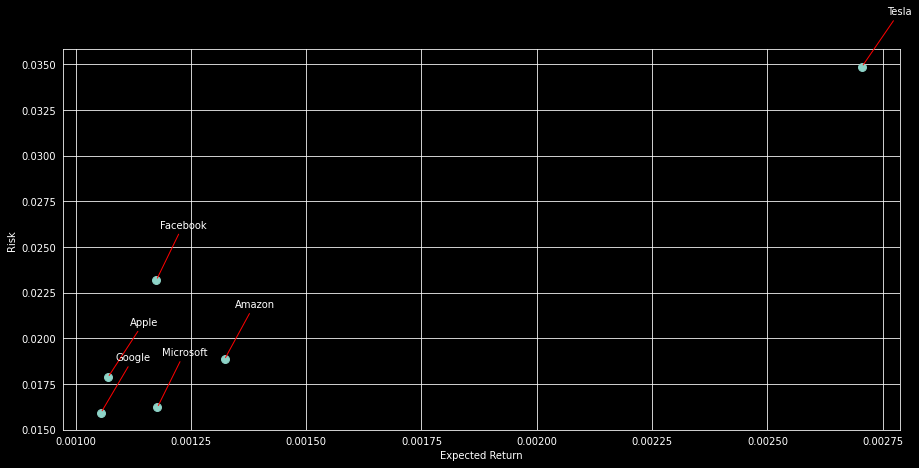

In [187]:
# Risk putting on stock
returns = daily_returns.dropna()
area =  np.pi * 20

plt.figure(figsize = (15,7))
plt.scatter(returns.mean(), returns.std(),s= area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(label, xy = (x, y), xytext = (50,50), textcoords = 'offset pixels', ha = 'right', va = 'bottom',arrowprops=dict(arrowstyle='-', color='red', connectionstyle='arc'))
    plt.savefig('risk_on_stock.png')
    files.download('risk_on_stock.png')

In [188]:
# Amazon Stock
from datetime import datetime
df_amazon = yf.download('AMZN', start = '2012-01-01', end = datetime.now())
df_amazon

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,175.889999,179.479996,175.550003,179.029999,179.029999,5110800
2012-01-04,179.210007,180.500000,176.070007,177.509995,177.509995,4205200
2012-01-05,175.940002,178.250000,174.050003,177.610001,177.610001,3809100
2012-01-06,178.070007,184.649994,177.500000,182.610001,182.610001,7008400
2012-01-09,182.759995,184.369995,177.000000,178.559998,178.559998,5056900
...,...,...,...,...,...,...
2021-09-28,3357.709961,3369.189941,3290.100098,3315.959961,3315.959961,4430800
2021-09-29,3322.110107,3351.300049,3297.870117,3301.120117,3301.120117,2562300
2021-09-30,3316.000000,3327.850098,3273.989990,3285.040039,3285.040039,2842400


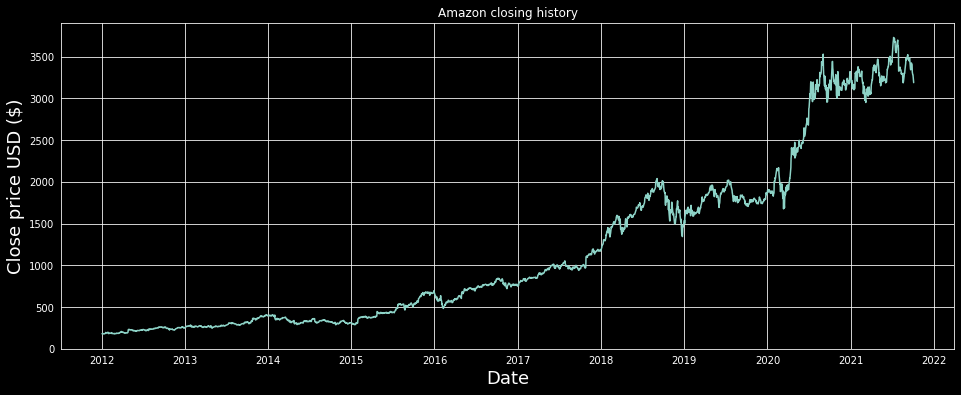

In [189]:
plt.figure(figsize = (16,6))
plt.title('Amazon closing history')
plt.plot(df_amazon['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close price USD ($)', fontsize = 18);

In [190]:
# DataFrame with 'Close' column
close = df_amazon.filter(['Close'])
closeset = close.values
training_data_len = int(np.ceil(len(closeset)* 0.95))
training_data_len

2333

In [191]:
# Feature Scaling
# Scaling the data for optimal performance so using MinMax Scaler to scale data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler_data = scaler.fit_transform(closeset)
scaler_data

array([[8.71895264e-04],
       [4.44384968e-04],
       [4.72512283e-04],
       ...,
       [8.74455803e-01],
       [8.73955159e-01],
       [8.47663355e-01]])

In [192]:
# Creating training set and testing set
train_data = scaler_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
      x_train.append(train_data[i-60:i, 0])
      y_train.append(train_data[i,0])
      if i<=61:
          print(x_train)
          print(y_train)
          print()

x_train,y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.0008719 , 0.00044438, 0.00047251, 0.00187879, 0.0007397 ,
       0.00095908, 0.00083533, 0.        , 0.00070033, 0.0016116 ,
       0.00379977, 0.00520886, 0.00421884, 0.00285756, 0.00311351,
       0.00333851, 0.00489105, 0.00546762, 0.00456197, 0.00520605,
       0.00099284, 0.00162847, 0.00330476, 0.00202786, 0.00232318,
       0.002686  , 0.00254537, 0.00270287, 0.00440447, 0.00432291,
       0.00240193, 0.00112502, 0.00184785, 0.00178035, 0.00130784,
       0.00083252, 0.00090002, 0.00073127, 0.00221349, 0.00105753,
       0.00115596, 0.00094784, 0.00121784, 0.00145128, 0.00220505,
       0.00329351, 0.00235974, 0.00209817, 0.00243568, 0.00178035,
       0.00239068, 0.00256506, 0.00269725, 0.0046126 , 0.00444385,
       0.00463229, 0.0053748 , 0.00757704, 0.00829987, 0.00709609])]
[0.008066423825883726]

[array([0.0008719 , 0.00044438, 0.00047251, 0.00187879, 0.0007397 ,
       0.00095908, 0.00083533, 0.        , 0.00070033, 0.0016116 ,
       0.00379977, 0.00520886, 0.0

**Building LSTM**

Modules required:
* Sequential - Initializing the neural network.
* Dense - Densely connected neural network layer.
* LSTM - Long Short-Term Memory layer.
* Dropout - Dropout layers that prevent overfitting.

In [193]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#LSTM model
model = Sequential()
model.add(LSTM(128,return_sequences= True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences =False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss= 'mean_squared_error')
model.fit(x_train,y_train, batch_size = 1, epochs = 1)

2273/2273 [==============================] - 77s 33ms/step - loss: 0.0013


In [195]:
# Set the time ste as 60
test_data = scaler_data[training_data_len - 60: , :]
x_test = []
y_test = closeset[training_data_len:, :]
for i in range(60, len(test_data)):
      x_test.append(test_data[i-60:i, 0])

# Reshape the data
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Model Predicted Values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


236.3753038722537

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

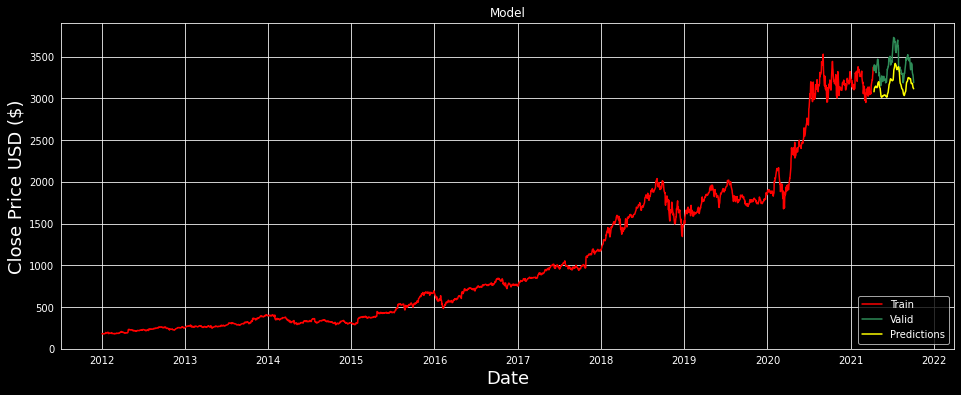

In [196]:
train = close[:training_data_len]
results = close[training_data_len:]
results['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'], color = 'red', label = 'Train')
plt.plot(results['Close'], color = 'seagreen', label = 'Valid')
plt.plot(results['Predictions'], color = 'yellow', label = 'Predictions')
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.savefig('model_forecast.png')
files.download('model_forecast.png');


From the plot you can observe that the train stock price went up and LSTM predicts that the price of the stock grows up, reflecting how the model behaves analyzes the time series and sequential data. 

In [197]:
results

,Close,Predictions
Date,,
2021-04-13,3400.000000,3080.276855
2021-04-14,3333.000000,3108.485840
2021-04-15,3379.090088,3120.866455
2021-04-16,3399.439941,3131.783936
2021-04-19,3372.010010,3142.835693
...,...,...
2021-09-28,3315.959961,3181.073486
2021-09-29,3301.120117,3168.957764
2021-09-30,3285.040039,3151.841309


    Practically,results show how the closing prices and predicted prices are analogous in nature and completely related.